In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd "/content/drive"

/content/drive


In [3]:
cd "My Drive/major"

/content/drive/My Drive/major


In [4]:
ls

'=0.6.2'                       mfcc_label.npy
'=1.0.0'                       mfcc_only.npy
'=.20'                         Models/
 all_signal_data.npy           namevsspeices.csv
 all_signal_label.npy          ngrok
 all_sig_waves.npy             ngrok-stable-linux-amd64.zip
 augmented.csv                 noise/
 augmented_data_unraveled.h5   None/
 birdsong_metadata.csv         preprocess.py
 cnnafteraugmentation.py       requirement_new.txt
 combined_feat.npy             songs/
 createtrainandtestdir.py      test/
 implementation1.h5            test_data_unraveled.h5
 log/                          train/
 mfcc+delta.npy                train_signal.csv


In [5]:


import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

In [7]:
import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()


Gen RAM Free: 12.3 GB  | Proc size: 901.9 MB
GPU RAM Free: 14858MB | Used: 221MB | Util   1% | Total 15079MB


In [8]:
!pip install keras==2.1.0

In [9]:
import keras
from keras.layers import Conv2D,Reshape,MaxPooling2D
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense,Flatten
from keras.optimizers import Adam
from keras.layers import Dropout
#import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img,array_to_img,img_to_array
import pandas as pd
print("keras_version: ",keras.__version__)

import gc
gc.collect()

Using TensorFlow backend.


keras_version:  2.1.0


0

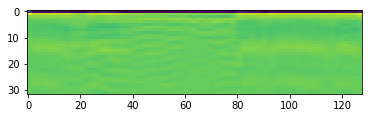

In [10]:
import matplotlib.pyplot as plt
X = np.load('mfcc_only.npy')/255
Y = pd.DataFrame({ 'label':np.load('mfcc_label.npy',allow_pickle = True)})

plt.imshow(X[9].reshape(32,128))


In [21]:

from collections import Counter
num_classes = len(pd.unique(Y.label))
print(Counter(Y.label).most_common(15))

AttributeError: ignored

In [0]:

Y = pd.get_dummies(Y.label).values

train_x,test_x,train_y,test_y =  train_test_split(X,Y,test_size = .1)

#del X
#del y
gc.collect()

img_size_flat = 32*128*1
img_shape = [32,128,1]
img_shape_full = [32,128,1]


In [0]:
print(train_x.shape,train_x.dtype)
print(train_y.shape,train_y.dtype)
print(num_classes)


In [14]:
'''from keras.callbacks import TensorBoard
from keras.utils import plot_model


def new_run_log_dir(base_dir): 
    log_dir = os.path.join('./log', base_dir) 
    if not os.path.exists(log_dir): 
        os.makedirs(log_dir) 
        run_id = len([name for name in os.listdir(log_dir)]) 
        run_log_dir = os.path.join(log_dir, str(run_id)) 
        return run_log_dir
      
#specific to tensorboard implementation on collab

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

log_dir = new_run_log_dir('tensorflow-demo')

get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(log_dir)
)
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
!ls
'''


'from keras.callbacks import TensorBoard\nfrom keras.utils import plot_model\n\n\ndef new_run_log_dir(base_dir): \n    log_dir = os.path.join(\'./log\', base_dir) \n    if not os.path.exists(log_dir): \n        os.makedirs(log_dir) \n        run_id = len([name for name in os.listdir(log_dir)]) \n        run_log_dir = os.path.join(log_dir, str(run_id)) \n        return run_log_dir\n      \n#specific to tensorboard implementation on collab\n\n!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip\n!unzip ngrok-stable-linux-amd64.zip\n\nlog_dir = new_run_log_dir(\'tensorflow-demo\')\n\nget_ipython().system_raw(\n    \'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &\'\n    .format(log_dir)\n)\nget_ipython().system_raw(\'./ngrok http 6006 &\')\n! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)[\'tunnels\'][0][\'public_url\'])"\n!ls\n'

In [0]:
def Model():
    model = Sequential()
    
    
    model.add(InputLayer(input_shape=img_shape_full))
    '''
    #print("shape outputted by the Input layer: ",model.output_shape)
    model.add(Reshape(target_shape = img_shape_full))
    #print("shape outputted by the reshape layer: ",model.output_shape)
    '''
    model.add(Conv2D(filters = 32,kernel_size = 3,activation = 'relu',strides = (2,2),padding = 'same',name = 'layer_conv1'))
    print("shape outputted by the first convolutional layer: ",model.output_shape)
    model.add(MaxPooling2D(pool_size = (3,3),strides = (1,2)))
    print("shape outputted by the MaxPooling Layer layer: ",model.output_shape)
    model.add(Conv2D(filters = 64,kernel_size = 5,activation = 'relu',strides = (2,1),padding = 'same',name = 'layer_conv2'))
    print("shape outputted by the second Convolutional layer: ",model.output_shape)
    model.add(MaxPooling2D(pool_size = (3,3),strides = (1,2)))
    print("shape outputted by the second Maxpooling layer: ",model.output_shape)
    
    
    '''
    model.add(Conv2D(filters = 64,kernel_size = 3,activation = 'relu'))
    #print("shape outputted by the convolutional layer: ",model.output_shape)
    model.add(MaxPooling2D(pool_size = (1,1), strides = (2,2)))
    '''
    
    batch_size = 16
    '''
    tensorboard = TensorBoard(log_dir=log_dir, 
                     write_graph=True,
                     write_grads=True,
                     batch_size=batch_size,
                     write_images=True)
    '''
    model.add(Dropout(rate = .5))
    print("shape outputted by the Dropout layer: ",model.output_shape)
    model.add(Flatten())
    print("shape outputted by the after flatten layer: ",model.output_shape)
    model.add(Dense(4096,activation = 'relu'))
    print("shape outputted by the after Dense layer: ",model.output_shape)
    
    model.add(Dense(num_classes,activation = 'softmax'))
    
    optimizer = Adam(.001)
    
    model.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
    history = model.fit(x= train_x,y=train_y,epochs = 50,batch_size = batch_size,validation_split = .1)#,callbacks = [tensorboard])
    
    result = model.evaluate(x = test_x,y = test_y)
    for name,value in zip(model.metrics_names,result):
        print('{0}: {1}'.format(name,value))
    
    
    return model,history


In [16]:
m,history = Model()

Instructions for updating:
Colocations handled automatically by placer.
shape outputted by the first convolutional layer:  (None, 16, 64, 32)
shape outputted by the MaxPooling Layer layer:  (None, 14, 31, 32)
shape outputted by the second Convolutional layer:  (None, 7, 31, 64)
shape outputted by the second Maxpooling layer:  (None, 5, 15, 64)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
shape outputted by the Dropout layer:  (None, 5, 15, 64)
Instructions for updating:
keep_dims is deprecated, use keepdims instead
shape outputted by the after flatten layer:  (None, 4800)
shape outputted by the after Dense layer:  (None, 4096)
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Train on 1727 samples, validate on 192 samples
Epoch 1/50
1727/1727 [==============================] - 4s 3ms/step - loss: 4.1833 - acc: 0.0706 - val_loss: 4.1606 - val_acc: 

In [0]:
#!pip install keras 2.1

In [0]:
m.save('Models/MFCCImplementation.h5')

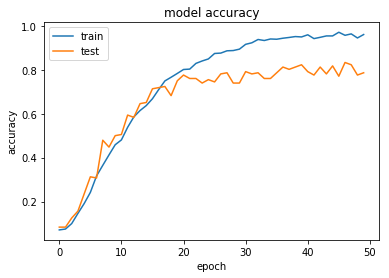

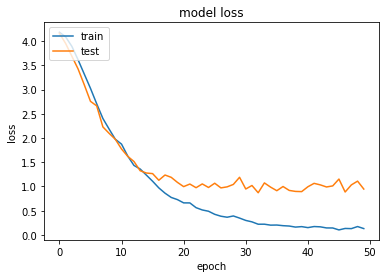

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [20]:
m.summary()

del train_x
del train_y
del test_x
del test_y


del history
del m
gc.collect()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 128, 1)        0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 16, 64, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 31, 32)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 7, 31, 64)         51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 15, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 15, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4800)              0         
__________

5216